### Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.43G/4.43G [01:54<00:00, 41.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3


In [3]:
import os

path = "/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3"
for root, dirs, files in os.walk(path):
    print(root)


/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/images
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/images/train
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/images/val
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels/train
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels/val
/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels2


Define yaml

In [4]:
names = ['face']

yaml_content = """
path: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3
train: images/train
val: images/val
nc: 1
names: ['face']
"""

with open("/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/data.yaml", "w") as f:
    f.write(yaml_content.strip())

print("✅ Created data.yaml successfully.")


✅ Created data.yaml successfully.


In [5]:
!cat /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/data.yaml


path: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3
train: images/train
val: images/val
nc: 1
names: ['face']

### Install ultralytics and set up model

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [1]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO("yolo11m.pt")  # load a pretrained model

# Define the correct path to the data.yaml file
yolo_yaml_path = os.path.join("/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3", "data.yaml")


# Train the model
results = model.train(
    data=yolo_yaml_path,
    epochs=22,
    imgsz=320,
    batch=40,
    optimizer="Adam",
    cache=True,
    patience=20,
    plots=True
)

New https://pypi.org/project/ultralytics/8.3.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=40, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=22, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=

train: Scanning /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels/train.cache... 13386 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13386/13386 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (2.7GB RAM): 100%|██████████| 13386/13386 [01:48<00:00, 123.10it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.0±36.7 MB/s, size: 235.1 KB)


val: Scanning /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.7GB RAM): 100%|██████████| 3347/3347 [00:29<00:00, 113.35it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000625), 112 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 22 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/22      5.12G      1.585      1.177      1.247        135        320: 100%|██████████| 335/335 [02:21<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:19<00:00,  2.17it/s]


                   all       3347      10299      0.228      0.448      0.175     0.0935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/22       6.6G      1.524      1.058      1.237        107        320: 100%|██████████| 335/335 [02:21<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]


                   all       3347      10299      0.675      0.446      0.482      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/22      6.62G      1.457     0.9752      1.211        130        320: 100%|██████████| 335/335 [02:17<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]


                   all       3347      10299      0.847      0.564      0.641      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/22      6.62G      1.372     0.8869      1.175        130        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:17<00:00,  2.40it/s]


                   all       3347      10299      0.738      0.384      0.426      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/22      6.69G      1.334     0.8485      1.156        175        320: 100%|██████████| 335/335 [02:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.28it/s]


                   all       3347      10299      0.866      0.635      0.706      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/22      6.69G      1.316     0.8298      1.147        121        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]


                   all       3347      10299      0.863      0.651      0.726      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/22      6.69G      1.294     0.8003      1.136        100        320: 100%|██████████| 335/335 [02:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:19<00:00,  2.11it/s]


                   all       3347      10299      0.875      0.661      0.741      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/22      6.69G      1.284     0.7918      1.133        151        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:19<00:00,  2.20it/s]

                   all       3347      10299      0.884      0.669      0.748      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/22      6.69G      1.262       0.77      1.124        145        320: 100%|██████████| 335/335 [02:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:19<00:00,  2.13it/s]


                   all       3347      10299      0.876      0.641      0.717      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/22      6.69G       1.25     0.7576      1.115        137        320: 100%|██████████| 335/335 [02:15<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]

                   all       3347      10299      0.886      0.682      0.762      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/22      6.69G      1.238     0.7435      1.115         98        320: 100%|██████████| 335/335 [02:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:19<00:00,  2.16it/s]

                   all       3347      10299      0.875      0.677      0.751      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/22      6.69G      1.232     0.7357      1.107        117        320: 100%|██████████| 335/335 [02:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]

                   all       3347      10299      0.868      0.689       0.76      0.481


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/22      6.69G      1.224     0.7077      1.117         48        320: 100%|██████████| 335/335 [02:15<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.22it/s]

                   all       3347      10299      0.884      0.677       0.76      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/22      6.69G      1.217       0.69      1.112         73        320: 100%|██████████| 335/335 [02:15<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]

                   all       3347      10299      0.886      0.682      0.763      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/22      6.69G      1.198     0.6731      1.101         64        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]

                   all       3347      10299      0.872      0.689      0.762      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/22      6.69G      1.181     0.6571      1.095         57        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]

                   all       3347      10299      0.888      0.704      0.776      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/22      6.69G      1.166     0.6428      1.087         68        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.26it/s]

                   all       3347      10299      0.885      0.707      0.782      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/22      6.69G      1.151     0.6234      1.081         95        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]

                   all       3347      10299       0.88      0.713      0.782      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/22      6.69G      1.136     0.6081      1.069         81        320: 100%|██████████| 335/335 [02:13<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]

                   all       3347      10299      0.892      0.714       0.79      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/22      6.69G      1.119      0.587      1.063         69        320: 100%|██████████| 335/335 [02:14<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.25it/s]

                   all       3347      10299      0.893      0.722      0.799      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/22      6.69G      1.103      0.576      1.056         66        320: 100%|██████████| 335/335 [02:14<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.23it/s]

                   all       3347      10299      0.892      0.729      0.808      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/22      6.69G      1.093     0.5585      1.048         54        320: 100%|██████████| 335/335 [02:14<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:18<00:00,  2.24it/s]

                   all       3347      10299      0.892      0.733      0.808      0.532



22 epochs completed in 0.956 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 40.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:21<00:00,  1.97it/s]


                   all       3347      10299      0.893      0.733      0.808      0.532
Speed: 0.0ms preprocess, 2.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train4


### Saved weight

In [2]:
import shutil

source_path = '/content/runs/detect/train4/weights/best.pt'
destination_path = '/content/drive/MyDrive/Colab Notebooks/Face_detection_yolov11/best.pt'

shutil.copy(source_path, destination_path)
print(f"File copied to {destination_path}")

File copied to /content/drive/MyDrive/Colab Notebooks/Face_detection_yolov11/best.pt


### Evaluate

In [3]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Face_detection_yolov11/best.pt'
model = YOLO(model_path)
metrics = model.val()

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1418.3±793.1 MB/s, size: 257.6 KB)


val: Scanning /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/labels/val.cache... 3347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3347/3347 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [00:38<00:00,  5.51it/s]


                   all       3347      10299      0.893      0.732      0.808      0.532
Speed: 0.1ms preprocess, 5.0ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val


### Show results

In [6]:
# Show val detect
import matplotlib.pyplot as plt

# Labels
print("Labels:")
img = plt.imread("/content/runs/detect/val/val_batch1_labels.jpg")
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

# Pred
print("\nPred:")
img = plt.imread("/content/runs/detect/val/val_batch1_pred.jpg")
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## **Show result**


image 1/1 /content/drive/MyDrive/Colab Notebooks/Face_detection_yolov11/test face detection yolo.jpg: 224x320 17 faces, 52.2ms
Speed: 1.1ms preprocess, 52.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 320)


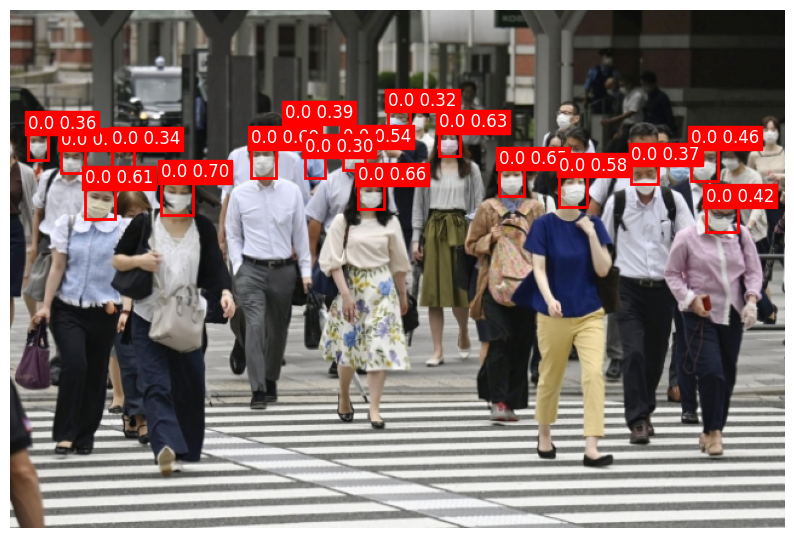

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

input_image_path = "/content/drive/MyDrive/Colab Notebooks/Face_detection_yolov11/test face detection yolo.jpg"
image = Image.open(input_image_path)

train_model_path = "/content/drive/MyDrive/Colab Notebooks/Face_detection_yolov11/best.pt"

model = YOLO(train_model_path)
results = model.predict(source=input_image_path)

# Plot the image and draw the bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

# Extract predictions
for result in results:
    # Extract bounding box coordinates
    boxes = result.boxes.xyxy.cpu().numpy()

    # Extract confidence scores
    scores = result.boxes.conf.cpu().numpy()

    # Extract class labels
    labels = result.boxes.cls.cpu().numpy()

    for box, score, label in zip(boxes, scores, labels):
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1

        # Draw the bounding box
        rect = plt.Rectangle((x1, y1), width, height, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)

        # Draw the label and confidence
        plt.text(x1, y1, f'{label} {score:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', edgecolor='red', pad=2.0))

plt.axis('off')
plt.show()


In [8]:
import torch
import gc

# Clear CUDA cache
torch.cuda.empty_cache()

# Collect garbage
gc.collect()

print("CUDA cache cleared and garbage collected.")

CUDA cache cleared and garbage collected.
